<a href="https://colab.research.google.com/github/hilaltekgz/CLIP/blob/main/clip_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=3612b069b9918314f9372682d9354a53d54f14bacc57d69a403c9137c7e7db0a
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-8u6o137x
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-8u6o137x
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369106 sha256=de4a38663f67eee12ba8780dd7a462e3282cec5f64edb2fc76b563012799032b
  Stored in directory: /tmp/pip-ephem-wheel-cache-sb2eco7s/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip


In [ ]:
import numpy as np

In [ ]:
import clip

clip.available_models()

['RN50', 'RN101', 'RN50x4', 'RN50x16', 'ViT-B/32', 'ViT-B/16']

In [ ]:
model, preprocess = clip.load("ViT-B/32")
model.cuda().eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 57.3MiB/s]


Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


Giriş görüntülerini yeniden boyutlandırıyoruz ve modelin beklediği görüntü çözünürlüğüne uymaları için kırpılır. Bunu yapmadan önce, veri seti ortalamasını ve standart sapmasını kullanarak piksel yoğunluğunu normalleştireceğiz.

In [ ]:
preprocess

Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    <function _convert_image_to_rgb at 0x7fcd71345e60>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

lip.tokenize() kullanılarak çağrılabilen, büyük/küçük harfe duyarlı olmayan bir belirteç kullanıyoruz. Varsayılan olarak çıktılar, CLIP modellerinin beklediği gibi 77 tokeb uzunluğunda olacak şekilde doldurulur.

Belirteç büyük/küçük harfe duyarsızdır ve herhangi bir uygun metinsel açıklamayı özgürce verebiliriz.

In [ ]:
clip.tokenize("Hello World!")

tensor([[49406,  3306,  1002,   256, 49407,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]])

In [ ]:
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# images in skimage to use and their textual descriptions
descriptions = {
    "page": "a page of text about segmentation",
    "chelsea": "a facial photo of a tabby cat",
    "astronaut": "a portrait of an astronaut with the American flag",
    "rocket": "a rocket standing on a launchpad",
    "motorcycle_right": "a red motorcycle standing in a garage",
    "camera": "a person looking at a camera on a tripod",
    "horse": "a black-and-white silhouette of a horse", 
    "coffee": "a cup of coffee on a saucer"
}

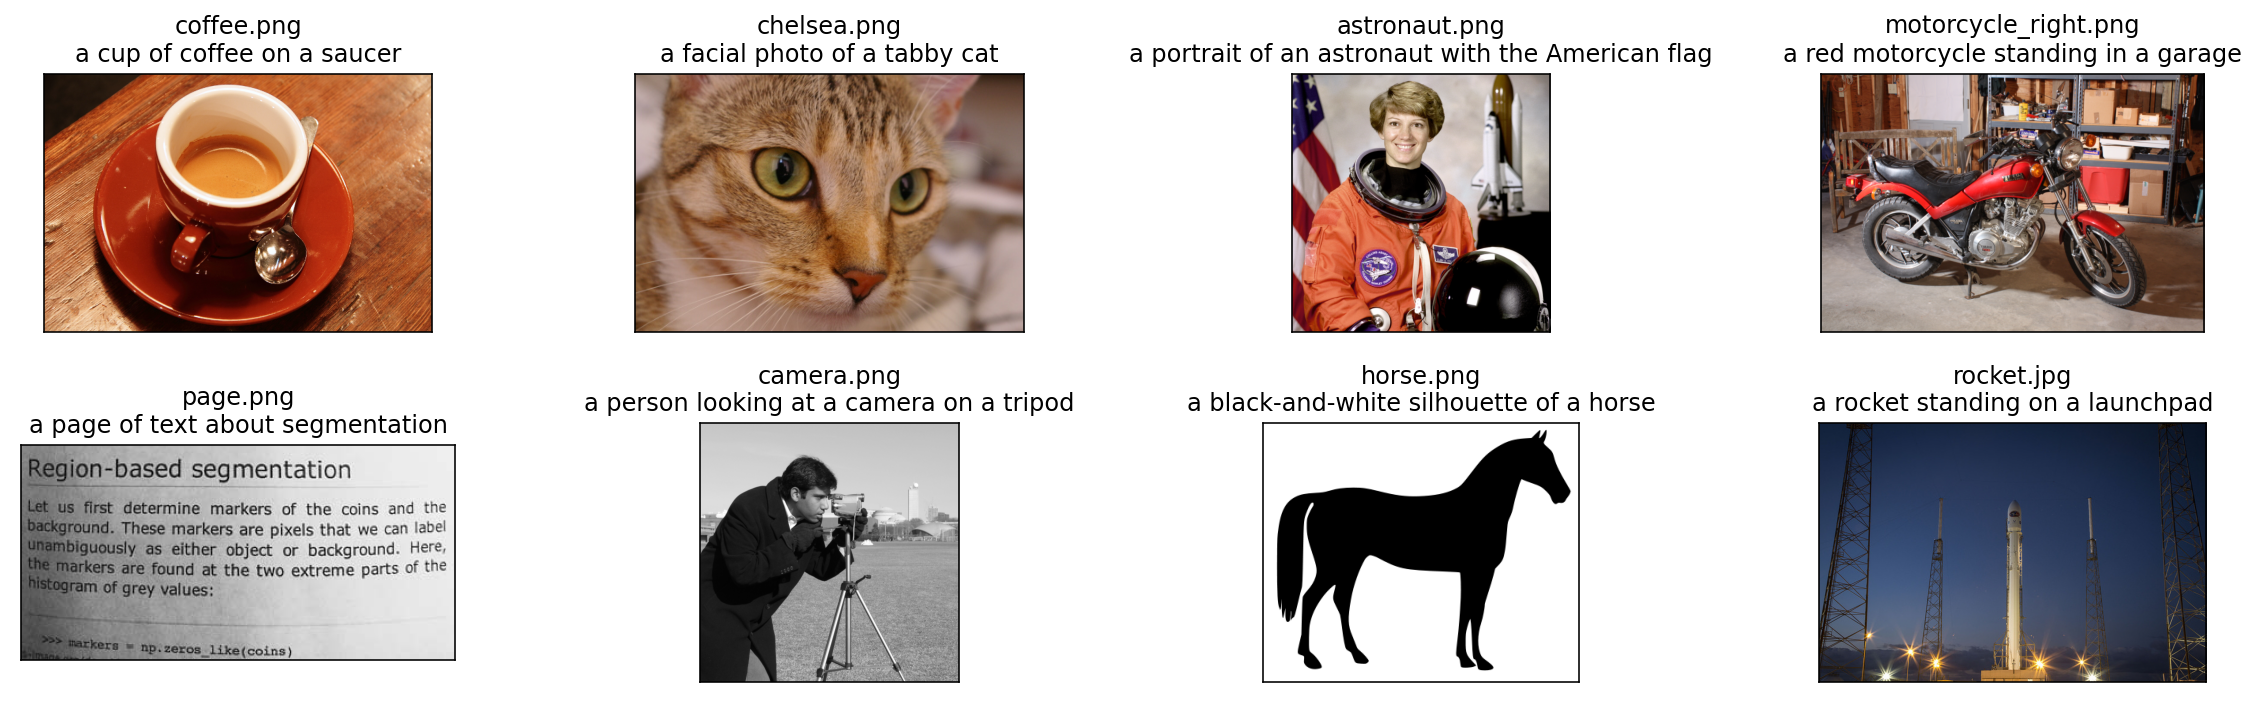

In [ ]:
original_images = []
images = []
texts = []
plt.figure(figsize=(16, 5))

for filename in [filename for filename in os.listdir(skimage.data_dir) if filename.endswith(".png") or filename.endswith(".jpg")]:
    name = os.path.splitext(filename)[0]
    if name not in descriptions:
        continue

    image = Image.open(os.path.join(skimage.data_dir, filename)).convert("RGB")
  
    plt.subplot(2, 4, len(images) + 1)
    plt.imshow(image)
    plt.title(f"{filename}\n{descriptions[name]}")
    plt.xticks([])
    plt.yticks([])

    original_images.append(image)
    images.append(preprocess(image))
    texts.append(descriptions[name])

plt.tight_layout()

In [ ]:
images

[tensor([[[-1.2229, -1.1937, -1.2083,  ...,  1.1858,  1.2150,  1.2588],
          [-1.2083, -1.1937, -1.2083,  ...,  1.2442,  1.2296,  1.2150],
          [-1.2083, -1.1937, -1.1937,  ...,  1.2150,  1.0836,  0.9668],
          ...,
          [ 1.7114,  1.7260,  1.7406,  ...,  0.6895,  1.0398,  0.9084],
          [ 1.7114,  1.7114,  1.7406,  ...,  0.9960,  0.8647,  0.6895],
          [ 1.7114,  1.7552,  1.7114,  ...,  0.7917,  0.6311,  1.0398]],
 
         [[-1.3619, -1.3319, -1.3619,  ...,  0.1689,  0.1989,  0.2740],
          [-1.3469, -1.3319, -1.3619,  ...,  0.1989,  0.2289,  0.2289],
          [-1.3469, -1.3319, -1.3319,  ...,  0.2139,  0.1239,  0.0038],
          ...,
          [ 1.2945,  1.3695,  1.4145,  ..., -0.4764, -0.1463, -0.2063],
          [ 1.3395,  1.3995,  1.4145,  ..., -0.2063, -0.2063, -0.4614],
          [ 1.3095,  1.3845,  1.3395,  ..., -0.2663, -0.4614, -0.1913]],
 
         [[-1.2527, -1.2385, -1.2527,  ..., -0.4279, -0.3853, -0.3426],
          [-1.2527, -1.2385,

In [ ]:
image_input = torch.tensor(np.stack(images)).cuda()  #yeni bir eksen boyunca aynı boyut dizilerinden oluşan bir diziyi birleştirmek için kullanılır
text_tokens = clip.tokenize(["This is " + desc for desc in texts]).cuda() 

In [ ]:
image_input[2]   

tensor([[[ 0.2953, -0.3616,  0.1931,  ...,  0.0471,  0.0471,  0.0179],
         [ 1.2588,  1.0252,  1.1420,  ...,  0.0617,  0.0325,  0.0471],
         [ 1.6530,  1.5362,  1.3172,  ...,  0.0471,  0.0471,  0.0325],
         ...,
         [ 0.9230,  0.9522,  0.8501,  ..., -0.6828, -0.9018, -1.7923],
         [ 0.9230,  0.8792,  0.6749,  ..., -0.6390, -1.6755, -1.7923],
         [ 0.8938,  0.7771,  0.4997,  ..., -0.8434, -1.2667, -1.7923]],

        [[ 0.3190, -0.2963,  0.2589,  ...,  0.0338,  0.0338,  0.0038],
         [ 1.2945,  1.0694,  1.2044,  ...,  0.0038,  0.0038,  0.0038],
         [ 1.6697,  1.5796,  1.3395,  ...,  0.0188,  0.0188,  0.0038],
         ...,
         [ 0.7692,  0.8292,  0.6792,  ..., -0.7466, -0.8816, -1.7521],
         [ 0.7842,  0.7392,  0.5141,  ..., -0.6715, -1.6470, -1.7521],
         [ 0.7692,  0.6191,  0.3190,  ..., -0.8516, -1.2118, -1.7521]],

        [[ 0.5959,  0.1977,  0.4253,  ...,  0.1124,  0.1124,  0.0698],
         [ 1.3638,  1.1789,  1.2216,  ...,  0

In [ ]:
text_tokens[0]

tensor([49406,   589,   533,   320,  1937,   539,  2453,   525,   320, 42272,
        49407,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0], device='cuda:0')

In [ ]:
with torch.no_grad(): # Bellek kullanımını azaltacak ve hesaplamaları hızlandırır.
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float() 

In [ ]:
#Cosine değerini hesaplama 
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T  # matris çarpımı 

Text(0.5, 1.0, 'Cosine similarity between text and image features')

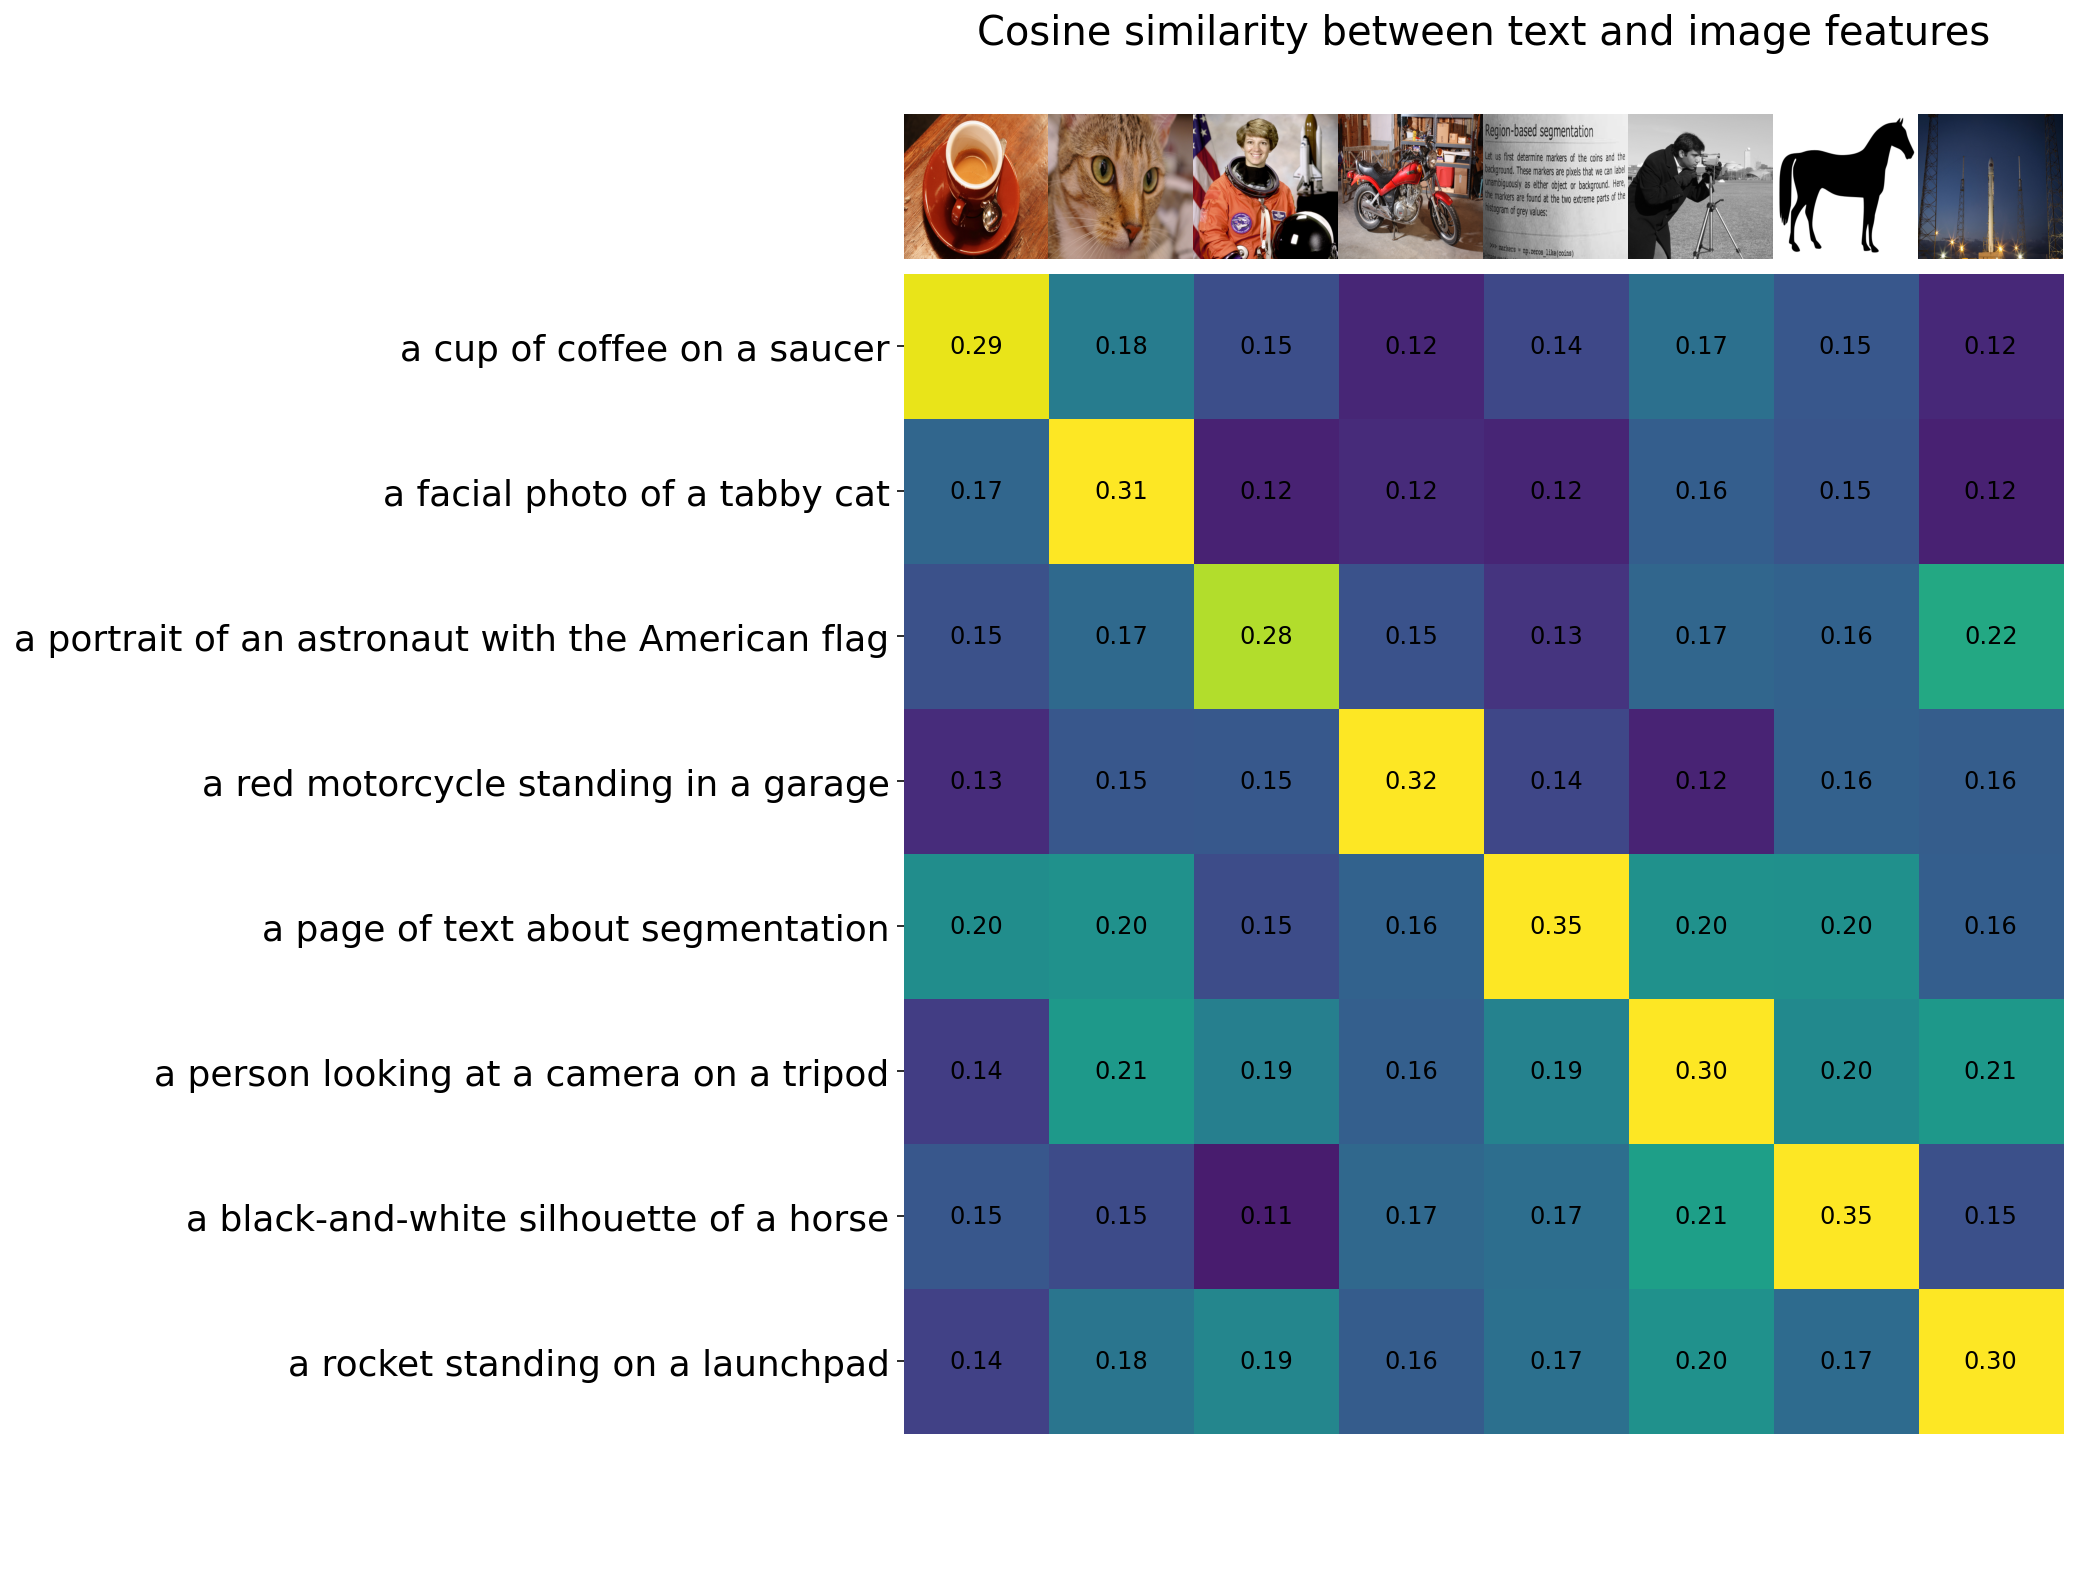

In [ ]:
count = len(descriptions)

plt.figure(figsize=(20, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.3)
# plt.colorbar()
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])
for i, image in enumerate(original_images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

plt.title("Cosine similarity between text and image features", size=20)

Zero-Shot Image Classification

 cosine similarity kullanıyor.

In [ ]:
from torchvision.datasets import CIFAR100

cifar100 = CIFAR100(os.path.expanduser("~/.cache"), transform=preprocess, download=True)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting /root/.cache/cifar-100-python.tar.gz to /root/.cache


In [ ]:
text_descriptions = [f"This is a photo of a {label}" for label in cifar100.classes]
text_tokens = clip.tokenize(text_descriptions).cuda()

In [ ]:
with torch.no_grad():
    text_features = model.encode_text(text_tokens).float()
    text_features /= text_features.norm(dim=-1, keepdim=True)

text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
top_probs, top_labels = text_probs.cpu().topk(5, dim=-1)

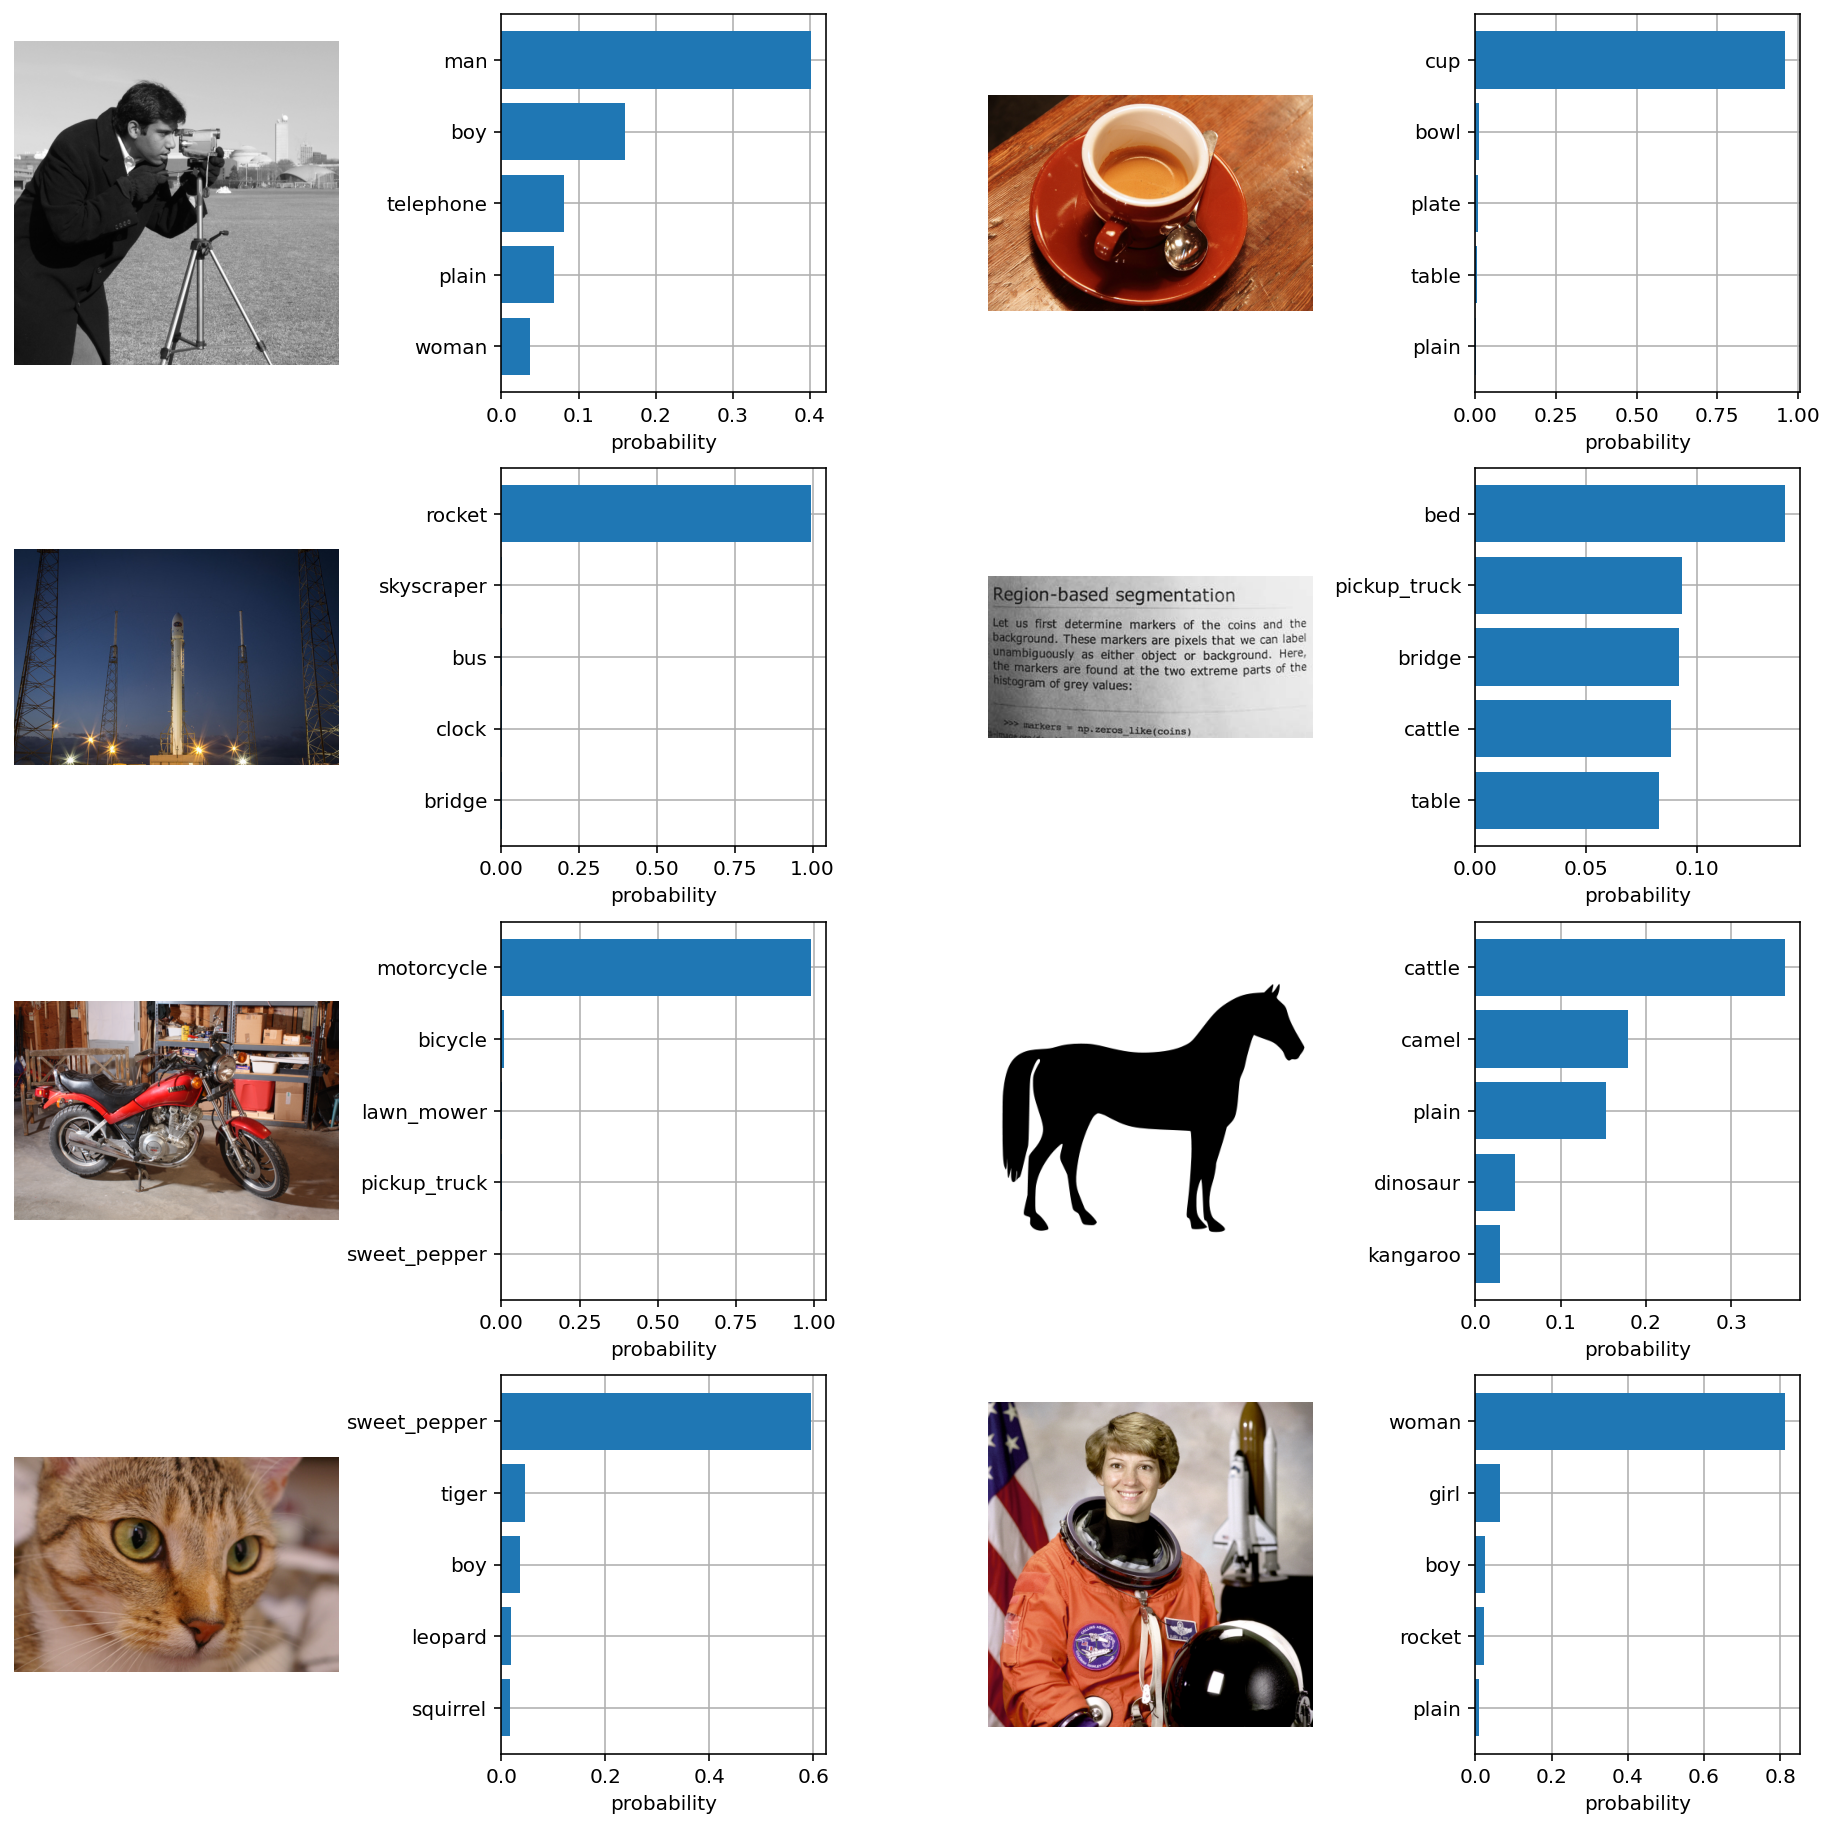

In [ ]:
plt.figure(figsize=(16, 16))

for i, image in enumerate(original_images):
    plt.subplot(4, 4, 2 * i + 1)
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(4, 4, 2 * i + 2)
    y = np.arange(top_probs.shape[-1])
    plt.grid()
    plt.barh(y, top_probs[i])
    plt.gca().invert_yaxis()
    plt.gca().set_axisbelow(True)
    plt.yticks(y, [cifar100.classes[index] for index in top_labels[i].numpy()])
    plt.xlabel("probability")

plt.subplots_adjust(wspace=0.5)
plt.show()